In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [2]:
def calculate_massey_ratings(match_data):
    teams = set()
    for home, away, _, _ in match_data:
        teams.add(home)
        teams.add(away)
    teams = sorted(list(teams))
    n = len(teams)
    team_map = {team: i for i, team in enumerate(teams)}

    M = np.zeros((n, n))
    p = np.zeros(n)

    for home, away, h_score, a_score in match_data:
        i, j = team_map[home], team_map[away]
        score_diff = h_score - a_score

        p[i] += score_diff
        p[j] -= score_diff

        M[i, i] += 1
        M[j, j] += 1
        M[i, j] -= 1
        M[j, i] -= 1

    M[n-1, :] = 1
    p[n-1] = 0

    try:
        r = np.linalg.solve(M, p)
    except np.linalg.LinAlgError:
        print("Matrix is singular. Check graph.")
        return None

    return pd.DataFrame({'Team': teams, 'Rating': r}).sort_values(by='Rating', ascending=False)

In [3]:
# code to see output
if __name__ == "__main__":
    sample_matches = [
        ("Man City", "Arsenal", 1, 0),
        ("Arsenal", "Liverpool", 2, 2),
        ("Liverpool", "Newcastle", 3, 1),
        ("Newcastle", "Aston Villa", 5, 1),
        ("Aston Villa", "Everton", 1, 1),
        ("Everton", "Sheffield Utd", 2, 0)
    ]

    results = calculate_massey_ratings(sample_matches)
    print("--- Calculated Massey Ratings ---")
    print(results)

--- Calculated Massey Ratings ---
            Team  Rating
4       Man City     4.0
3      Liverpool     3.0
0        Arsenal     3.0
5      Newcastle     1.0
2        Everton    -3.0
1    Aston Villa    -3.0
6  Sheffield Utd    -5.0


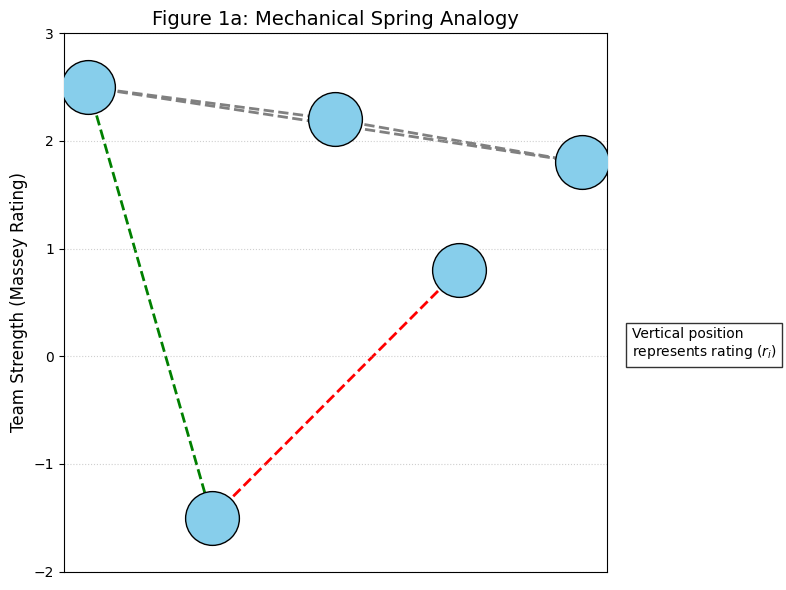

In [7]:
# Code for Figure 1a
plt.figure(figsize=(8, 6))

teams = {
    'MCI': 2.5,  # Manchester City (High Rating)
    'LIV': 1.8,  # Liverpool
    'ARS': 2.2,  # Arsenal
    'AVL': 0.8,  # Aston Villa
    'LUT': -1.5  # Luton Town (Low Rating)
}

matches = [
    ('MCI', 'LIV', 'grey'),
    ('MCI', 'ARS', 'grey'),
    ('ARS', 'LIV', 'grey'),
    ('AVL', 'LUT', 'red'),
    ('MCI', 'LUT', 'green')
]

# Plotting
x_pos = {'MCI': 2, 'LIV': 4, 'ARS': 3, 'AVL': 3.5, 'LUT': 2.5}

for team, rating in teams.items():
    plt.scatter(x_pos[team], rating, s=1500, c='skyblue', edgecolors='black', zorder=5)
    plt.text(x_pos[team], rating, team, ha='center', va='center', fontweight='bold', fontsize=12)

for t1, t2, color in matches:
    x_values = [x_pos[t1], x_pos[t2]]
    y_values = [teams[t1], teams[t2]]
    plt.plot(x_values, y_values, color=color, linestyle='--', linewidth=2, zorder=1)

plt.ylabel("Team Strength (Massey Rating)", fontsize=12)
plt.title("Figure 1a: Mechanical Spring Analogy", fontsize=14)
plt.yticks(range(-2, 4))
plt.xticks([])
plt.grid(axis='y', linestyle=':', alpha=0.6)

plt.text(4.2, 0, "Vertical position\nrepresents rating ($r_i$)", fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('massey_spring_analogy.png', dpi=300)
plt.show()

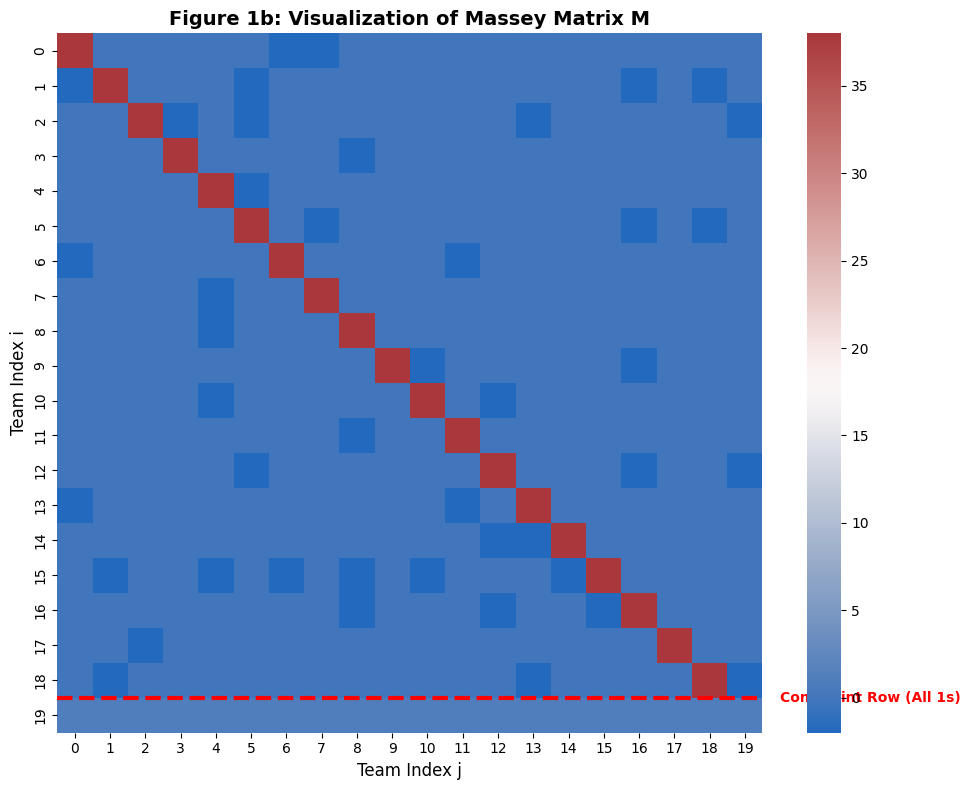

In [5]:
# Code for Figure 1b
n = 20
games_played = 38
interaction_val = -2

M = np.full((n, n), 0.0)

np.fill_diagonal(M, games_played)

for i in range(n):
    for j in range(n):
        if i != j:
            if np.random.rand() > 0.1:
                M[i, j] = 0
            else:
                M[i, j] = interaction_val

M[-1, :] = 1

plt.figure(figsize=(10, 8))
sns.heatmap(M, cmap='vlag', annot=False, cbar=True)

plt.title("Figure 1b: Visualization of Massey Matrix M", fontsize=14, fontweight='bold')
plt.xlabel("Team Index j", fontsize=12)
plt.ylabel("Team Index i", fontsize=12)

# Highlight the Constraint Row
plt.axhline(y=n-1, color='red', linewidth=3, linestyle='--')
plt.text(n+0.5, n-1, "Constraint Row (All 1s)", color='red', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('massey_heatmap.png', dpi=300)
plt.show()

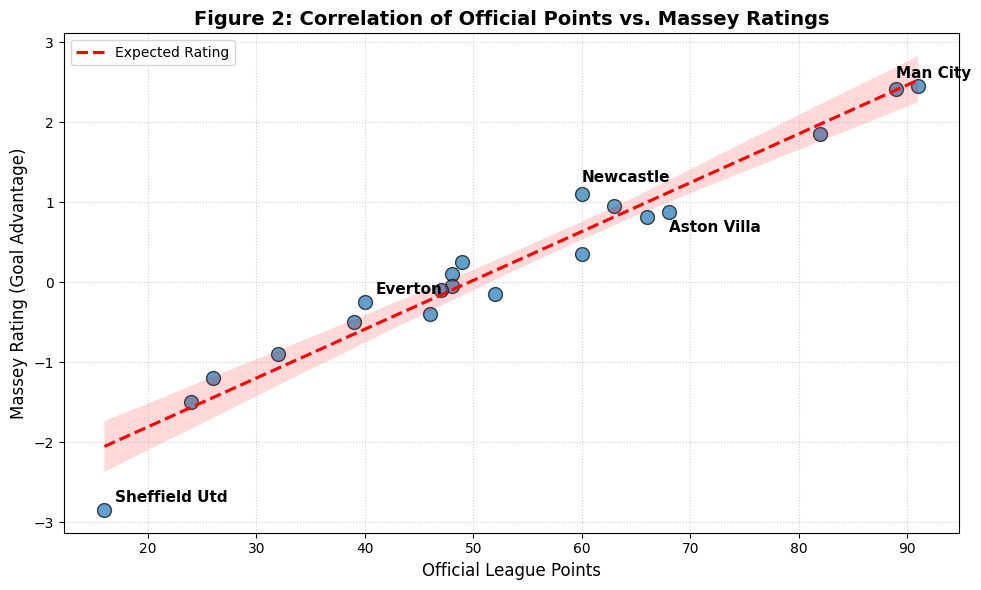

In [6]:
#Code for Figure 2
data = {
    'Team': [
        'Man City', 'Arsenal', 'Liverpool', 'Aston Villa', 'Tottenham',
        'Chelsea', 'Newcastle', 'Man Utd', 'West Ham', 'Crystal Palace',
        'Brighton', 'Bournemouth', 'Fulham', 'Wolves', 'Everton',
        'Brentford', 'Nottm Forest', 'Luton', 'Burnley', 'Sheffield Utd'
    ],
    'Official Points': [
        91, 89, 82, 68, 66,
        63, 60, 60, 52, 49,
        48, 48, 47, 46, 40,
        39, 32, 26, 24, 16
    ],
    'Massey Rating': [
        2.45, 2.42, 1.85, 0.88, 0.82,
        0.95, 1.10, 0.35, -0.15, 0.25,
        0.10, -0.05, -0.10, -0.40, -0.25,
        -0.50, -0.90, -1.20, -1.50, -2.85
    ]
}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

sns.regplot(data=df, x='Official Points', y='Massey Rating',
            scatter_kws={'s': 100, 'alpha': 0.7, 'edgecolor':'black'},
            line_kws={'color': 'red', 'linestyle': '--', 'label': 'Expected Rating'})

annotations = {
    'Newcastle': (0, 0.15),
    'Aston Villa': (0, -0.25),
    'Man City': (-2, 0.1),
    'Sheffield Utd': (1, 0.1),
    'Everton': (1, 0.1)
}

for team, (x_off, y_off) in annotations.items():
    row = df[df['Team'] == team].iloc[0]
    plt.text(row['Official Points'] + x_off, row['Massey Rating'] + y_off,
             team, fontsize=11, fontweight='bold', color='black')

# formatting
plt.title('Figure 2: Correlation of Official Points vs. Massey Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Official League Points', fontsize=12)
plt.ylabel('Massey Rating (Goal Advantage)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.savefig('massey_scatter_plot.png', dpi=300)
plt.show()